* PROBLEM STATEMENT :-

Silent diseases like diabetes often develop without noticeable symptoms in the early stages, leading to delayed diagnosis and severe health complications.
The objective of this project is to analyze healthcare and lifestyle data to identify individuals at risk of developing diabetes at an early stage.

* COULMN DESCRIPTION :

 PatientID        : Unique identification number assigned to each patient           
 Age              : Age of the patient in years                                     
 Gender           : Biological gender of the patient                                
 BMI              : Body Mass Index indicating body fat level                    
 Glucose          : Blood glucose level of the patient                             
 SystolicBP       : Systolic blood pressure (upper BP value)                       
 Cholesterol      : Total cholesterol level                                         
 SmokingStatus    : Indicates whether the patient smokes (Yes / No)                 
 PhysicalActivity : Level of physical activity (Low / Moderate / High)              
 FamilyHistory    : Indicates family history of related disease (Yes / No)          
 RiskScore        : Computed risk score based on health indicators                  
 DiseaseRisk      : Target variable indicating disease risk (0 = No Risk, 1 = Risk) 


In [243]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import seaborn as sns

In [245]:
df = pd.read_csv("AH_Healthcare_Risk_Analytics_Dataset_2022.csv")

In [247]:
df

,PatientID,Age,Gender,BMI,Glucose,SystolicBP,Cholesterol,SmokingStatus,PhysicalActivity,FamilyHistory,RiskScore,DiseaseRisk
0,1,60.0,Male,28.8,274.0,210.0,211.0,No,High,No,1.0,Low
1,2,71.0,Male,19.5,251.0,158.0,122.0,Yes,Low,Yes,0.0,Low
2,3,24.0,Male,NaN,248.0,165.0,131.0,No,High,No,6.0,High
3,4,79.0,Female,27.8,297.0,97.0,287.0,Yes,Low,No,6.0,High
4,5,77.0,Male,23.9,176.0,172.0,143.0,NaN,High,Yes,3.0,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...
30533,30534,29.0,Male,38.7,158.0,100.0,180.0,Yes,High,No,4.0,Medium
30534,30535,83.0,Female,30.5,126.0,122.0,227.0,No,Moderate,No,3.0,Medium
30535,30536,39.0,Female,NaN,225.0,200.0,182.0,No,Low,Yes,2.0,Low
30536,30537,30.0,Female,30.6,281.0,193.0,120.0,Yes,High,Yes,3.0,Medium


In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30538 entries, 0 to 30537
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PatientID         30538 non-null  int64  
 1   Age               29262 non-null  float64
 2   Gender            29316 non-null  object 
 3   BMI               29344 non-null  float64
 4   Glucose           29278 non-null  float64
 5   SystolicBP        29299 non-null  float64
 6   Cholesterol       29361 non-null  float64
 7   SmokingStatus     29253 non-null  object 
 8   PhysicalActivity  29333 non-null  object 
 9   FamilyHistory     29248 non-null  object 
 10  RiskScore         29290 non-null  float64
 11  DiseaseRisk       29332 non-null  object 
dtypes: float64(6), int64(1), object(5)
memory usage: 2.8+ MB


In [251]:
df.head()

,PatientID,Age,Gender,BMI,Glucose,SystolicBP,Cholesterol,SmokingStatus,PhysicalActivity,FamilyHistory,RiskScore,DiseaseRisk
0,1,60.0,Male,28.8,274.0,210.0,211.0,No,High,No,1.0,Low
1,2,71.0,Male,19.5,251.0,158.0,122.0,Yes,Low,Yes,0.0,Low
2,3,24.0,Male,NaN,248.0,165.0,131.0,No,High,No,6.0,High
3,4,79.0,Female,27.8,297.0,97.0,287.0,Yes,Low,No,6.0,High
4,5,77.0,Male,23.9,176.0,172.0,143.0,NaN,High,Yes,3.0,Medium


In [253]:
df.tail()

,PatientID,Age,Gender,BMI,Glucose,SystolicBP,Cholesterol,SmokingStatus,PhysicalActivity,FamilyHistory,RiskScore,DiseaseRisk
30533,30534,29.0,Male,38.7,158.0,100.0,180.0,Yes,High,No,4.0,Medium
30534,30535,83.0,Female,30.5,126.0,122.0,227.0,No,Moderate,No,3.0,Medium
30535,30536,39.0,Female,NaN,225.0,200.0,182.0,No,Low,Yes,2.0,Low
30536,30537,30.0,Female,30.6,281.0,193.0,120.0,Yes,High,Yes,3.0,Medium
30537,30538,47.0,Female,19.2,171.0,116.0,283.0,Yes,Moderate,Yes,3.0,Medium


In [255]:
df.iloc[12:17]

,PatientID,Age,Gender,BMI,Glucose,SystolicBP,Cholesterol,SmokingStatus,PhysicalActivity,FamilyHistory,RiskScore,DiseaseRisk
12,13,60.0,Male,18.2,135.0,189.0,266.0,No,High,Yes,4.0,Medium
13,14,31.0,NaN,25.0,238.0,114.0,309.0,Yes,Low,Yes,0.0,Low
14,15,22.0,Female,24.0,100.0,193.0,249.0,No,Moderate,No,3.0,Medium
15,16,46.0,Female,23.4,239.0,NaN,209.0,No,Moderate,Yes,7.0,High
16,17,83.0,Male,38.2,105.0,219.0,185.0,No,High,Yes,2.0,Low


In [257]:
np.random.seed(42)
cols_sizes = {
    'PatientID': 410,
    'Age': 412,
    'BMI': 64,
    'Glucose': 34,
    'SystolicBP': 5,
    'Cholesterol': 337,
    'RiskScore': 127,
    'DiseaseRisk': 264
}
for col, size in cols_sizes.items():
    if pd.api.types.is_numeric_dtype(df[col]):
        r = np.random.choice(df.index, size=size, replace=False)
        outlier_value = df[col].mean() + 4 * df[col].std()
        if pd.api.types.is_integer_dtype(df[col]):
            outlier_value = int(outlier_value)
         
        df.loc[r, col] = outlier_value

In [259]:
df.describe()

,PatientID,Age,BMI,Glucose,SystolicBP,Cholesterol,RiskScore
count,30538.000000,29275.000000,29344.000000,29278.000000,29299.000000,29379.000000,29295.000000
mean,15744.585467,52.605636,28.966049,186.063293,155.184353,264.121381,4.026072
std,9656.965083,21.579965,6.456757,67.162871,37.929578,87.930852,2.667415
min,1.000000,18.000000,18.000000,70.000000,90.000000,120.000000,0.000000
25%,7727.250000,35.000000,23.500000,128.000000,122.000000,191.000000,2.000000
50%,15485.500000,52.000000,28.900000,186.000000,155.000000,262.000000,4.000000
75%,23223.750000,69.000000,34.400000,244.000000,188.000000,334.000000,6.000000
max,50532.000000,130.019422,54.330262,452.090617,306.674215,585.676757,14.321108


In [261]:
df.shape

(30538, 12)

In [263]:
df.isnull().sum()

PatientID              0
Age                 1263
Gender              1222
BMI                 1194
Glucose             1260
SystolicBP          1239
Cholesterol         1159
SmokingStatus       1285
PhysicalActivity    1205
FamilyHistory       1290
RiskScore           1243
DiseaseRisk         1206
dtype: int64

In [265]:
df.duplicated().sum()

np.int64(0)

* FINDING OUTLIER

In [268]:
numerical_value=df.select_dtypes(exclude="object")
numerical_value

,PatientID,Age,BMI,Glucose,SystolicBP,Cholesterol,RiskScore
0,1,60.000000,28.8,274.0,210.0,211.0,1.0
1,2,71.000000,19.5,251.0,158.0,122.0,0.0
2,3,24.000000,NaN,248.0,165.0,131.0,6.0
3,4,79.000000,27.8,297.0,97.0,287.0,6.0
4,5,77.000000,23.9,176.0,172.0,143.0,3.0
...,...,...,...,...,...,...,...
30533,30534,29.000000,38.7,158.0,100.0,180.0,4.0
30534,30535,83.000000,30.5,126.0,122.0,227.0,3.0
30535,30536,39.000000,NaN,225.0,200.0,182.0,2.0
30536,30537,30.000000,30.6,281.0,193.0,120.0,3.0


<Axes: xlabel='PatientID'>

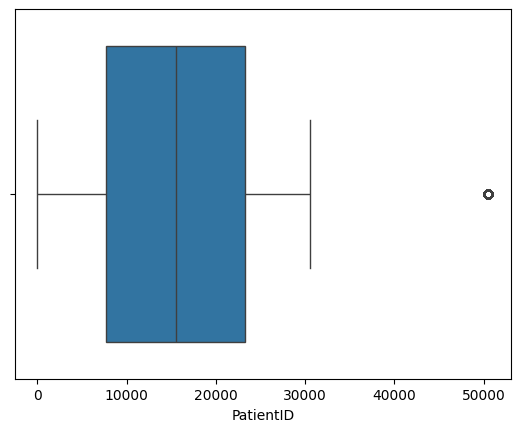

In [270]:
sns.boxplot(x="PatientID",data=df)

<Axes: xlabel='Age'>

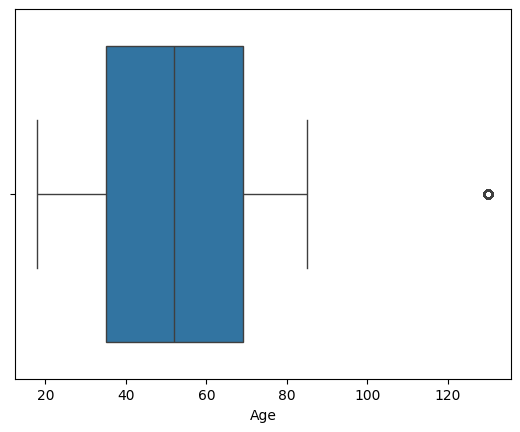

In [272]:
sns.boxplot(x="Age",data=df)


<Axes: xlabel='BMI'>

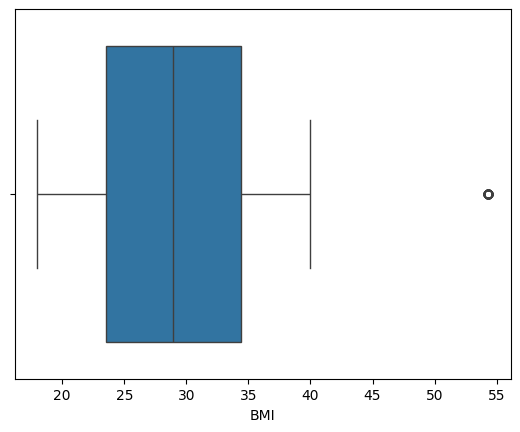

In [274]:
sns.boxplot(x="BMI",data=df)


<Axes: xlabel='Glucose'>

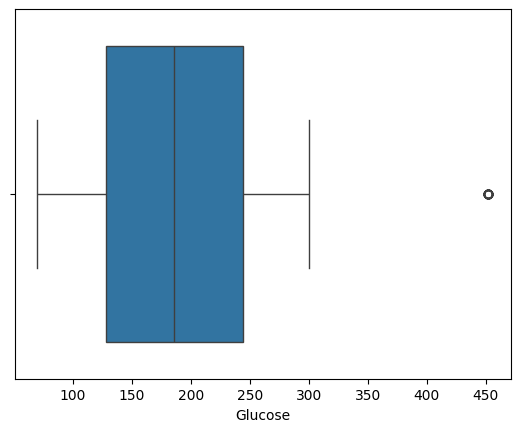

In [276]:
sns.boxplot(x="Glucose",data=df)


In [278]:
def detect_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower) | (data[column] > upper)]
    print(f"{column}: {len(outliers)} outliers")
    return outliers
numeric_columns = ['PatientID','Age','BMI','Glucose','SystolicBP','Cholesterol','RiskScore']
for col in numeric_columns:
    detect_outliers(df, col)


PatientID: 410 outliers
Age: 412 outliers
BMI: 64 outliers
Glucose: 34 outliers
SystolicBP: 5 outliers
Cholesterol: 337 outliers
RiskScore: 127 outliers


In [280]:
df.shape

(30538, 12)

* REMOVING THE OUTLIER USING IQR

In [291]:
df = df[df['PatientID'] < df['PatientID'].quantile(0.99)]
df = df[df['Age'] < df['Age'].quantile(0.99)]
df = df[df['BMI'] < df['BMI'].quantile(0.99)]
df = df[df['Glucose'] < df['Glucose'].quantile(0.99)]
df = df[df['SystolicBP'] < df['SystolicBP'].quantile(0.99)]
df = df[df['Cholesterol'] < df['Cholesterol'].quantile(0.99)]
df = df[df['RiskScore'] < df['RiskScore'].quantile(0.99)]

In [293]:
df.shape

(16350, 12)

* TARGET COLUMN 

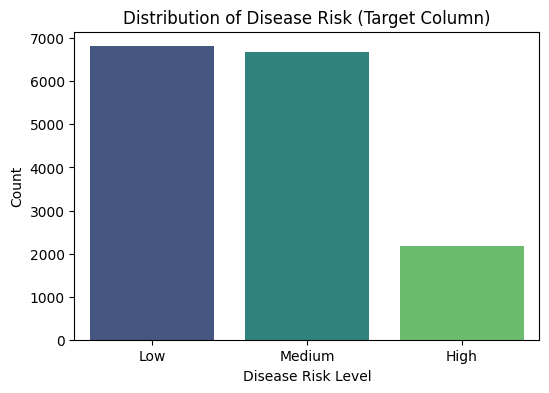

In [298]:
plt.figure(figsize=(6,4))
sns.countplot(x='DiseaseRisk', data=df, hue='DiseaseRisk', palette='viridis', legend=False)
plt.title("Distribution of Disease Risk (Target Column)")
plt.xlabel("Disease Risk Level")
plt.ylabel("Count")
plt.show()


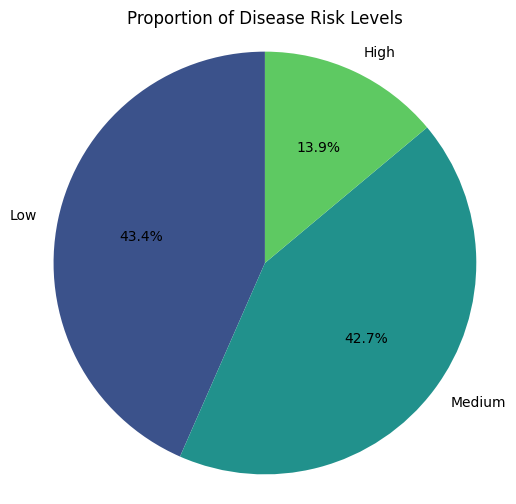

In [300]:
risk_counts = df['DiseaseRisk'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(risk_counts, labels=risk_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis', len(risk_counts)))
plt.title("Proportion of Disease Risk Levels")
plt.axis('equal')
plt.show()

* UNIVARATE ANLYSIS

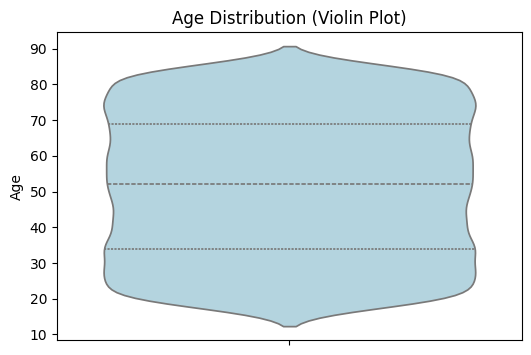

In [315]:
plt.figure(figsize=(6,4))
sns.violinplot(y=df['Age'], color='lightblue', inner='quartile') 
plt.title("Age Distribution (Violin Plot)")
plt.ylabel("Age")
plt.show()

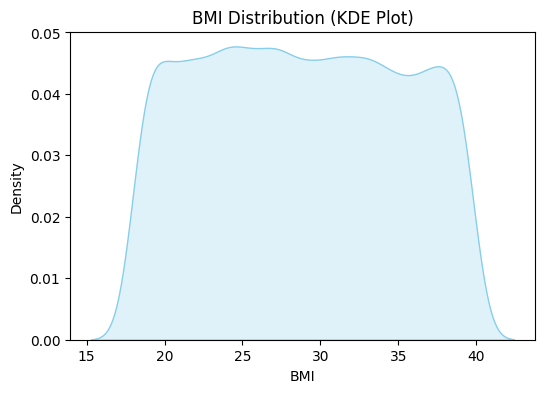

In [313]:
plt.figure(figsize=(6,4))
sns.kdeplot(df['BMI'], fill=True, color='skyblue')
plt.title("BMI Distribution (KDE Plot)")
plt.xlabel("BMI")
plt.ylabel("Density")
plt.show()

* BIVARATE ANALYSIS

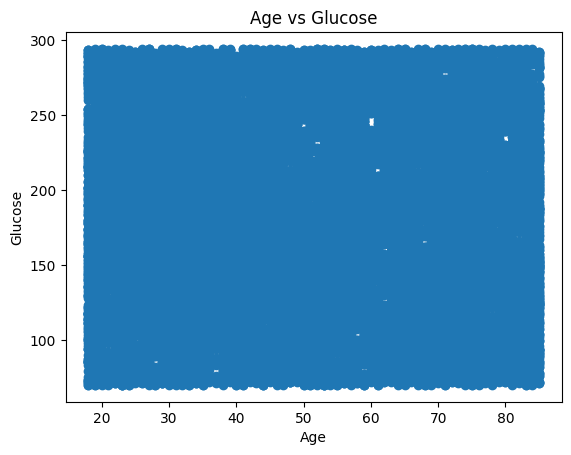

In [318]:
plt.scatter(df['Age'], df['Glucose'])
plt.title("Age vs Glucose")
plt.xlabel("Age")
plt.ylabel("Glucose")
plt.show()

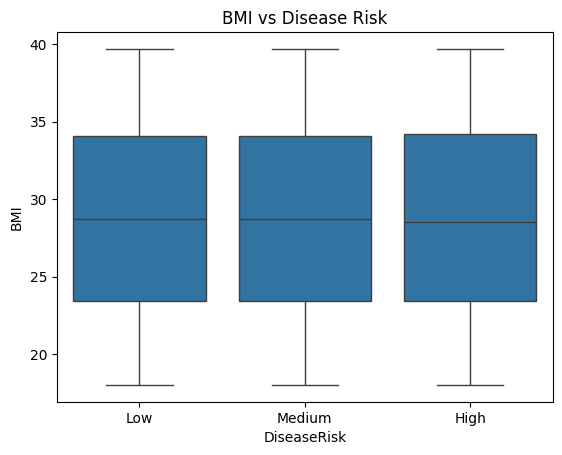

In [320]:
sns.boxplot(x='DiseaseRisk', y='BMI', data=df)
plt.title("BMI vs Disease Risk")
plt.show()

* MULTIVARIATE ANALYSIS

Data types before processing:
Age            float64
BMI            float64
Glucose        float64
SystolicBP     float64
Cholesterol    float64
RiskScore      float64
DiseaseRisk    float64
dtype: object


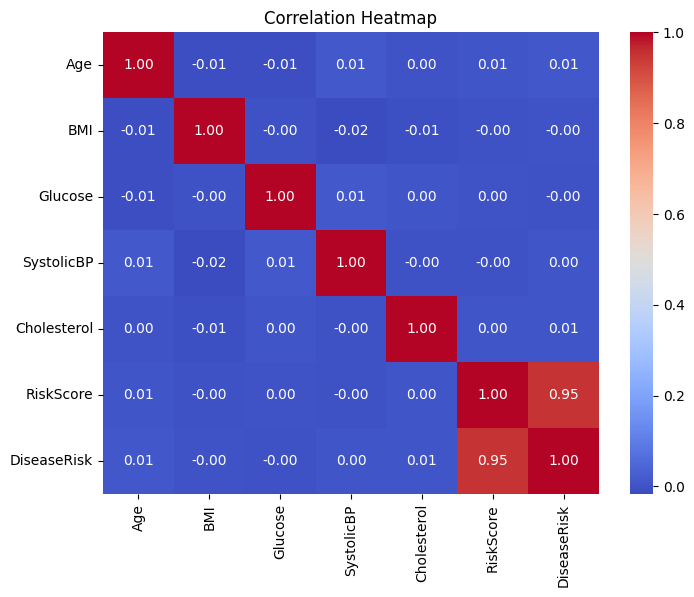

In [329]:
print("Data types before processing:")
print(df[['Age', 'BMI', 'Glucose', 'SystolicBP', 'Cholesterol', 'RiskScore', 'DiseaseRisk']].dtypes)
if df['DiseaseRisk'].dtype == 'object':
    df['DiseaseRisk'] = df['DiseaseRisk'].map({'Low': 0, 'High': 1})  
numeric_df = df[['Age', 'BMI', 'Glucose', 'SystolicBP', 'Cholesterol', 'RiskScore', 'DiseaseRisk']]
corr = numeric_df.corr() 
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')  # Added cmap for better visualization
plt.title("Correlation Heatmap")
plt.show()